# Aprendizado profundo com Python

## 6.2 Compreendendo redes neurais recorrentes

> Compreendendo a rede neural recorrente

Tanto a rede totalmente conectada quanto a rede neural convolucional que usamos antes são chamadas de redes feedforward. Esse tipo de rede não tem memória, ou seja, processam cada entrada individualmente, sem salvar nenhum estado entre a entrada e a entrada. Nesse tipo de rede, se quisermos processar sequências de tempo / texto, devemos processar uma sequência completa em um grande tensor e passá-la para a rede como um todo, de modo que o modelo possa ver a sequência completa de cada vez.

Isso é obviamente diferente da maneira como nós, humanos, lemos e aprendemos textos e outras informações. Não olhamos o livro inteiro de relance. Precisamos olhar para ele palavra por palavra. Enquanto movemos nossos olhos para adquirir novos dados, devemos lembrar o conteúdo anterior e vincular o conteúdo novo e antigo para entender a frase inteira. o significado de. Para ser mais abstrato, vamos salvar um modelo interno do conteúdo processado, esse modelo é construído com base em informações anteriores e é constantemente atualizado à medida que novas informações entram. Todos nós processamos as informações dessa forma progressiva.

De acordo com essa ideia, temos um novo modelo chamado ** rede neural recorrente ** (rede neural recorrente, RNN), esta rede irá percorrer todos os elementos da sequência, e salvar um estado que registra as informações relacionadas ao conteúdo visualizado (Estado). Ao processar a próxima sequência, o estado RNN será redefinido. Ao usar RNN, ainda podemos produzir a sequência inteira de uma rede, mas dentro da rede, os dados não são mais processados ​​diretamente, mas os elementos da sequência são percorridos automaticamente.


Para entender as redes neurais recorrentes, usamos o Numpy para escrever à mão uma versão de brinquedo do passe para a frente RNN. Considere o processamento de uma sequência de forma `(timesteps, input_features)`, RNN itera em timesteps, combina os input_features do timestep atual com o estado obtido na etapa anterior para calcular a saída desta etapa e, em seguida, salva esta saída como um novo estado para Use na próxima etapa. Na primeira etapa, não há estado, então o estado é inicializado em um vetor totalmente zero, que é chamado de estado inicial da rede.

Código falso:

`` `python
state_t = 0
para input_t em input_sequence:
    output_t = f (input_t, state_t)
    state_t = output_t
`` `

O `f (...)` aqui é realmente semelhante à nossa camada Densa, mas aqui não apenas a saída é processada, mas a influência do estado também é adicionada ao mesmo tempo. Portanto, ele precisa conter 3 parâmetros: as matrizes W e U que atuam e emitem e indicam respectivamente, e o vetor de deslocamento b:

`` `python
def f (input_t, state_t):
    ativação de retorno (
        ponto (W, entrada_t) + ponto (U, estado_t) + b
    )
`` `


Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes repositórios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os códigos originais e em caso de dúvida podem me contatar para conversarmos. 

In [22]:
import numpy as np
Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes repositórios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os códigos originais e em caso de dúvida podem me contatar para conversarmos. 
# Defina várias dimensões
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []

for input_t in inputs:    # input_t: (input_features, )
    output_t = np.tanh(   # output_t: (output_features, )
        np.dot(W, input_t) + np.dot(U, state_t) + b
    )
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, axis=0)  # (timesteps, output_features)

print(successive_outputs[-1].shape)
print(final_output_sequence.shape)


(64,)
(100, 64)


Aqui, nossa saída final é uma forma de (timesteps, output_features), que é o resultado de todos os timesteps. Mas, na verdade, geralmente usamos apenas o último resultado `sucessive_outputs [-1]`, que já contém os resultados de todas as etapas anteriores, ou seja, contém as informações de toda a sequência.

### Camada cíclica em Keras

Reprocesse a versão do brinquedo agora, para que possa receber a entrada com a forma de `(batch_size, timesteps, input_features)`, processe-a em lotes e obtenha a camada `SimpleRNN` em keras:

`` `python
de tensorflow.keras.layers import SimpleRNN
`` `

Esta camada SimpleRNN e outras camadas recorrentes em keras têm dois modos de saída opcionais:

| Formato de saída | Descrição | Uso |
| --- | --- | --- |
| `(batch_size, timesteps, output_features)` | Output a seqüência completa de cada timestep output | return_sequences = True |
| `(batch_size, output_features)` | Retorna apenas a saída final de cada seqüência | return_sequences = False (default) |



In [15]:
# Retorna apenas a saída da última etapa de tempo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Retorne a sequência de status completa

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Se quisermos empilhar várias camadas RNN, a camada do meio deve retornar a sequência de estado completa:

In [18]:
# Empilhar várias camadas RNN, a camada do meio retorna a sequência de estado completa

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))   # A última camada precisa da última saída
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


A seguir, tentamos usar o RNN para lidar com o IMDB novamente. Primeiro, prepare os dados:

In [19]:
# Prepare os dados IMDB

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_train shape:', input_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_train shape: (25000, 500)


Construa e treine a rede:

In [20]:
# Use a camada de incorporação e a camada SimpleRNN para treinar o modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 17s 107ms/step - loss: 0.6445 - acc: 0.6106 - val_loss: 0.6140 - val_acc: 0.6676
Epoch 2/10
157/157 [==============================] - 20s 129ms/step - loss: 0.4139 - acc: 0.8219 - val_loss: 0.4147 - val_acc: 0.8194
Epoch 3/10
157/157 [==============================] - 20s 124ms/step - loss: 0.3041 - acc: 0.8779 - val_loss

Desenhe o processo de treinamento para ver:

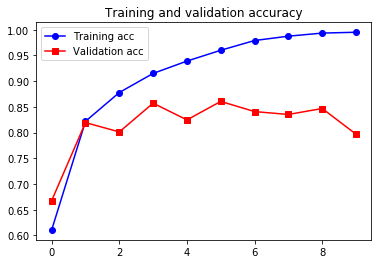

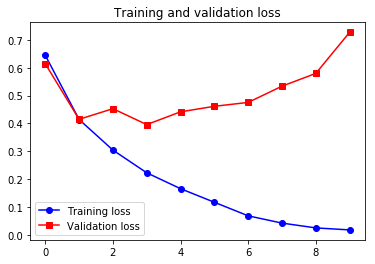

In [21]:
# Resultados de desenho

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Emmmm, na verdade, o resultado desse modelo não é tão bom quanto o modelo do Capítulo 3, que é empilhado com várias camadas totalmente conectadas. Há várias razões: uma é que consideramos apenas as primeiras 500 palavras de cada sequência aqui, e a outra é que o SimpleRNN, na verdade, não é bom em lidar com sequências muito longas. A seguir, veremos algumas camadas de loop que podem ter um desempenho melhor.

#### Camada LSTM e camada GRU

No Keras, além do SimpleRNN, há mais camadas LSTM "não simples" e camadas GRU, as duas últimas serão mais comumente usadas.

SimpleRNN tem alguns problemas. Em teoria, ao passar para a etapa de tempo t, ele deve ser capaz de reter as informações vistas em muitas etapas anteriores, mas em aplicações práticas, devido a um tipo de problema de gradiente de desaparecimento (gradiente Desaparecendo problema), ele não pode aprender esta dependência de longo prazo.

O problema do gradiente de desaparecimento realmente ocorre em redes feedforward com mais camadas. A principal manifestação é que, conforme o número de camadas aumenta, a rede não pode ser treinada. A camada LSTM e a camada GRU são criadas para combater esse problema.

A camada ** LSTM ** é baseada no algoritmo LSTM (long short-term memory), que é projetado especificamente para lidar com o problema de gradientes de desaparecimento. Na verdade, sua ideia central é guardar informações para uso posterior, para evitar que as informações obtidas na frente desapareçam gradualmente no processamento subsequente.

Com base no SimpleRNN, o LSTM adiciona um método de transmissão de informações em várias etapas de tempo. O que esse novo método faz é como uma correia transportadora auxiliar próxima à sequência. As informações na sequência podem pular na correia transportadora em qualquer posição e, então, ser transmitidas para uma etapa de tempo posterior e voltar intactas quando necessário.


Aqui, renomeamos os pesos W e U em SimpleRNN para Wo e Uo (o significa saída). Em seguida, um fluxo de dados de "faixa de transporte" é adicionado, o qual é usado para transportar informações em intervalos de tempo. As informações ct da etapa de tempo t são colocadas nesta faixa de transporte (c significa carry). Essas informações serão calculadas junto com a entrada e o estado e afetarão o estado passado para a próxima etapa de tempo:

`` `pythoon
output_t = ativação (ponto (state_t, Uo) + ponto (input_t, Wo) + ponto (C_t, Vo) + bo)

i_t = ativação (ponto (estado_t, Ui) + ponto (entrada_t, Wi) + bi)
f_t = ativação (ponto (estado_t, Uf) + ponto (entrada_t, Wf) + bf)
k_t = ativação (ponto (estado_t, Uk) + ponto (entrada_t, Wk) + bk)

c_t_next = i_t * k_t + c_t * f_t
`` `

Mais detalhes e implementação interna do LSTM não serão introduzidos. Não precisamos entender a estrutura específica da unidade LSTM. Não é humano entender isso. Precisamos apenas lembrar o papel da unidade LSTM: ela permite que as informações anteriores sejam usadas novamente mais tarde para combater o problema do gradiente de desaparecimento.

(P.S. O autor disse que isso é metafísica, apenas confie nele. Emmm, essa frase é minha idiota, o ditado original é: "pode ​​parecer um pouco arbitrário, mas tenha paciência comigo.")

** GRU ** (Gated Recurrent Unit, Gated Recurrent Unit), o livro menciona relativamente poucos, consulte este artigo "[Todos podem compreender GRU] (https://zhuanlan.zhihu.com/p/ 32481747) ", digamos que GRU é provavelmente uma variante do LSTM. O princípio dos dois não é muito diferente e o efeito real é semelhante. Mas GRU é mais novo que LSTM. Ele fez algumas simplificações e é mais fácil de calcular, mas a capacidade de representação correspondente pode ser um pouco pior.

#### Usando LSTM em Keras

Vamos continuar a usar os dados IMDB processados antes de executar um LSTM:

In [24]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 37s 236ms/step - loss: 0.5143 - acc: 0.7509 - val_loss: 0.3383 - val_acc: 0.8672
Epoch 2/10
157/157 [==============================] - 37s 235ms/step - loss: 0.3010 - acc: 0.8834 - val_loss: 0.2817 - val_acc: 0.8862
Epoch 3/10
157/157 [==============================] - 34s 215ms/step - loss: 0.2357 - acc: 0.9129 - val_loss

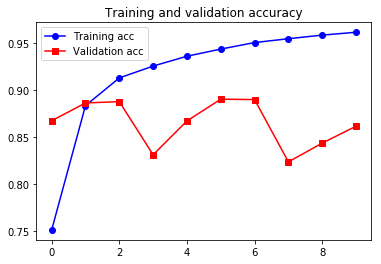

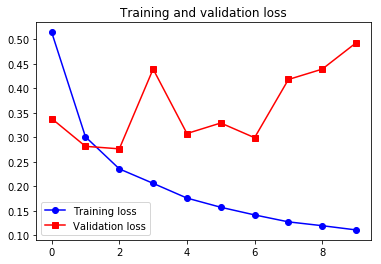

In [25]:
# Resultado do sorteio

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Muito melhor do que SimpleRNN. Mas não é muito melhor do que o tipo anterior de rede que usa uma camada totalmente conectada e é mais lento (o custo de computação é alto). Na verdade, é principalmente devido a problemas como análise de sentimento. Usar LSTM para analisar a estrutura geral de longo prazo não é muito útil LSTM é bom em problemas de processamento de linguagem natural mais complexos, como tradução automática. Usando o método totalmente conectado, na verdade, é feito para ver quais palavras aparecem e sua frequência, o que é mais eficaz para esses problemas simples.

Então, vamos tentar o GRU que não é mencionado no livro:

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 37s 238ms/step - loss: 0.5119 - acc: 0.7386 - val_loss: 0.3713 - val_acc: 0.8434
Epoch 2/10
157/157 [==============================] - 36s 232ms/step - loss: 0.2971 - acc: 0.8806 - val_loss: 0.3324 - val_acc: 0.8722
Epoch 3/10
157/157 [==============================] - 37s 235ms/step - loss: 0.2495 - acc: 0.9034 - val_loss

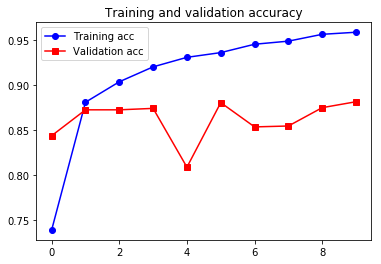

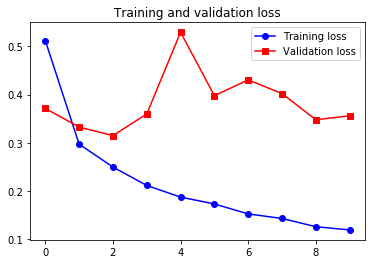

In [26]:
#Altere LSTM para usar GRU

from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

# Resultado do sorteio

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Não há muita diferença.